Total error: 0.019233006363776898
MSE: 0.000192330063637769
[0.015084122123766521, 1.0001716469348818]
steps: 32
final alpha: 0.0001
32


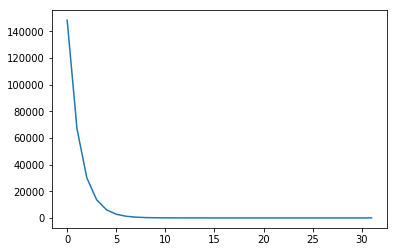

In [283]:
import numpy as np
import matplotlib.pyplot as plt
def hypothesis(x, theta):
    return theta[1] * x + theta[0]
def costfunc(x, y, theta):
    return np.sum((y - hypothesis(x, theta))**2)
#partial derivative of theta_0
def dcostfunc0(x, y, theta):
    m = x.shape[0]
    return (1./m) * np.sum(hypothesis(x, theta) - y)
#partial derivative of theta_1
def dcostfunc1(x, y, theta):
    m = x.shape[0]
    return (1./m) * np.sum((hypothesis(x, theta) - y) * x)
def adjust(x, y, theta, alpha):
    tmp0 = theta[0] - alpha * dcostfunc0(x, y, theta)
    tmp1 = theta[1] - alpha * dcostfunc1(x, y, theta)
    return [tmp0, tmp1]
x = np.array(np.arange(0,100))
y = np.array(np.arange(0,100))
noise = np.random.randint(0, 50, (100))/1000.
y = y + noise
theta = [0, 0]
alpha = 0.0001

count = 0
c = costfunc(x, y, theta)
prev = c
alphafactor = 0.95
costs = []
while (count < 10000):
    theta = adjust(x, y, theta, alpha)
    c = costfunc(x, y, theta)
    if np.abs(prev - c) / prev < 1e-4:
        break
    #else:
    #    print([c, prev, alpha])
    if (c > prev):
        alpha = alpha * alphafactor
        alphafactor = alphafactor * 0.6
    #    print(np.abs(prev - c) / c)
    prev = c
    costs.append(c)
    #print("cost", c)
    count += 1
#for i in range(0,1500):
#  theta = adjust(x, y, theta, alpha)
totalerr = costfunc(x, y, theta)
print("Total error: " + str(totalerr))
print("MSE: " + str(totalerr / x.shape[0]))

print(theta)
print("steps: " + str(count))
print("final alpha: " + str(alpha))
print(len(costs))
plt.plot(np.arange(0, len(costs)), costs)
plt.show()

In [284]:
#([(x - (0.99977535408*x + 0.0149473903))**2 for x in np.arange(1,100)])
xy_bar = np.mean(x*y)
x_bar = np.mean(x)
y_bar = np.mean(y)
x2_bar = np.mean(x*x)
x_bar2 = x_bar**2
m = (xy_bar - x_bar * y_bar) / (x2_bar - x_bar2)
a = y_bar - m * x_bar
print("slope: " + str(m))
print("intercept: " + str(a))


slope: 1.0000837743774373
intercept: 0.02104316831684372


In [287]:
#Use (X'X)^-1 X'y
def getWeights(x, y):
    x = x.reshape(x.shape[0], 1)
    xones = np.ones(x.shape[0]).reshape(x.shape[0], 1)
    x = np.hstack((xones, x))
    return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
print getWeights(x, y)

[0.02104317 1.00008377]


In [282]:
b = np.array([1,2,3,4]).reshape(4,1)
A = np.array([[4,5,6,7],[3,4,8,7],[3,1,3,2],[4,3,7,8]])
print (A)
print(b)
x1 = np.linalg.solve(A,b).reshape(4,1)
print(x1)
#print (A.dot(x1))


[[4 5 6 7]
 [3 4 8 7]
 [3 1 3 2]
 [4 3 7 8]]
[[1]
 [2]
 [3]
 [4]]
[[ 0.93406593]
 [-1.23076923]
 [ 0.35164835]
 [ 0.18681319]]


In [291]:
#Example of noninvertible matrix
A = np.array([[1, 2], [1, 2]])
#pseudo-inverse always gives answer
print(np.linalg.pinv(A))
#but inverse will report "singular matrix"
np.linalg.inv(A)

[[0.1 0.1]
 [0.2 0.2]]


LinAlgError: Singular matrix

Open questions: 

- How to determine a good (or optimal?) value for alpha
- Generalize the derivatative function for any member of theta
- Adapt to use samples of entire data set; so generate very large data set with some noise and then sample from it
  - Proper methodology? Sample size? Use several samples each time and do averages? How does this work?
- Turn x into 2-d matrix with 1's in the first column, adjust functions accordingly